## ML Decision Tree

### Steps we will be using

  * Import the data
  * Clean the data
  * Split the data into Training/Test sets
  * Model selection
  * Train the model
  * Make Predictions
  * Evaluate and Improve

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



music_data = pd.read_csv('./musicdt.csv')

music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


### Cleaning the data (Split data set)

In [14]:
X = music_data.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [15]:
y = music_data['genre']

y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

### Model Selection (Decision Tree) 

In [16]:
model = DecisionTreeClassifier()

### Next - Train the model

In [17]:
model.fit(X, y)

DecisionTreeClassifier()

### Next - Prediction

In [18]:
predictions = model.predict([[21, 1], [22, 0]])

predictions

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

### Evaluation (Accuracy)

To do this, we split the data - training and testing.

We assign 70-80% of our data for training and then use the other 20-30% for testing.

Now, instead evaluating based on our `provided prediction`, we can now compare our `prediction` result against the `test` set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)

score



1.0

## Persisting model (PSM)

**PMS** talks about model resusability.

We use the `joblib` library to achieve this.

In [20]:
from joblib import dump, load

dump(model, 'music-recommender.joblib')




['music-recommender.joblib']

### Next - we load our model

In [21]:
saved_model = load("./music-recommender.joblib")

predictions_using_sm = saved_model.predict([[21, 1], [22, 0]])

predictions_using_sm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

## Visualizing Decision Trees

In [22]:
from sklearn import tree

tree.export_graphviz(
    model, 
    out_file="music-recommender.dot", 
    feature_names=['age', 'gender'],
    class_names=sorted(y.unique()),
    label='all',
    rounded=True,
    filled=True
    )



**Show generated decision tree with `Mtp`**

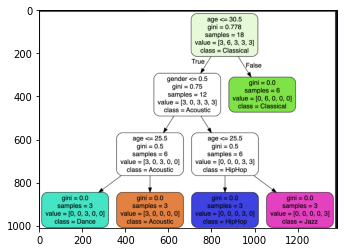

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg

img = npimg.imread("./deciTree.png")

implot = plt.imshow(img)

plt.show()